In [11]:
import pandas as pd
import requests
df = pd.read_csv('AMD.csv')
    

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.000000,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.000000,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.000000,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.000000,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.000000,3.020833,2.906250,2.916667,2.916667,130800
...,...,...,...,...,...,...,...
11064,2024-02-05,179.089996,180.009995,171.110001,174.229996,174.229996,76349200
11065,2024-02-06,173.149994,173.880005,165.500000,167.880005,167.880005,68854100
11066,2024-02-07,169.470001,172.970001,168.199997,170.940002,170.940002,53665400
11067,2024-02-08,170.330002,172.169998,168.600006,169.350006,169.350006,43385300


In [13]:
df = df[['Date','Close']]


In [14]:
df.index = df.pop('Date')

In [15]:
df

,Close
Date,
1980-03-17,3.145833
1980-03-18,3.031250
1980-03-19,3.041667
1980-03-20,3.010417
1980-03-21,2.916667
...,...
2024-02-05,174.229996
2024-02-06,167.880005
2024-02-07,170.940002


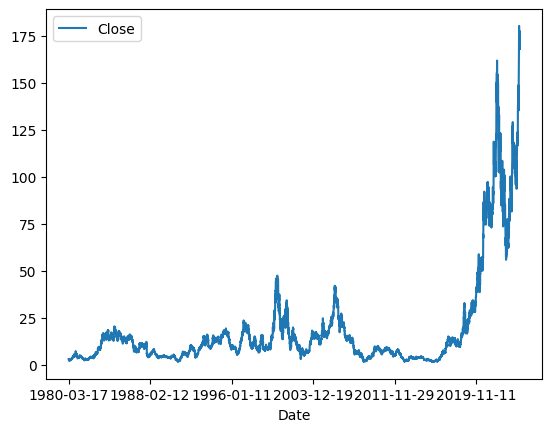

In [18]:
import matplotlib.pyplot as plt


df.plot()
plt.show()

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
#Generates Time Series Data by converting it into a supervised learning problem
generator = TimeseriesGenerator(df['Close'].values, df['Close'].values, length=3, batch_size=1)

In [21]:
#Reformatting the data
dates = df.index.values[3:]
input_matrix = np.zeros((len(dates), 3))
output_matrix = np.zeros((len(dates), 1))
for i in range(generator.__len__()):
    x,y =generator.__getitem__(i)
    input_matrix[i] = x
    output_matrix[i] = y
input_matrix = input_matrix.reshape((len(dates), 3, 1))
output_matrix = output_matrix.reshape((len(dates)))


In [22]:

from sklearn.model_selection import train_test_split
X_train, temp_x_test, y_train, temp_y_test = train_test_split(input_matrix, output_matrix, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(temp_x_test, temp_y_test, test_size=0.5, shuffle=False)

dates_train = dates[:X_train.shape[0]]
dates_val = dates[X_train.shape[0]:X_train.shape[0]+X_val.shape[0]]
dates_test = dates[X_train.shape[0]+X_val.shape[0]:]


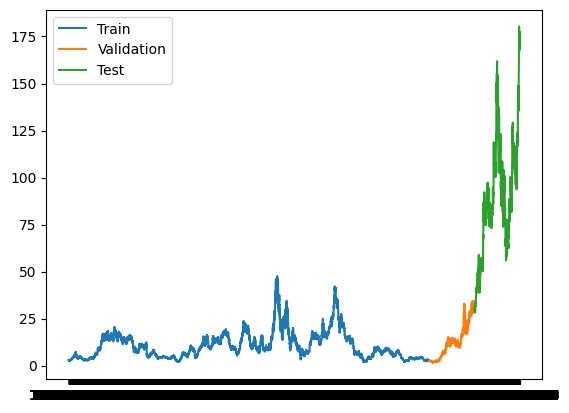

In [23]:
#plot test train validation data
plt.plot(dates_train, y_train, label='Train')
plt.plot(dates_val, y_val, label='Validation')
plt.plot(dates_test, y_test, label='Test')
plt.legend()


In [24]:
#print X_train and y_train in a format that shows input and the corresponding output
for i in range(X_train.shape[0]):
    print('Input: ', X_train[i].flatten(), 'Output: ', y_train[i])


Input:  [3.145833 3.03125  3.041667] Output:  3.010417
Input:  [3.03125  3.041667 3.010417] Output:  2.916667
Input:  [3.041667 3.010417 2.916667] Output:  2.666667
Input:  [3.010417 2.916667 2.666667] Output:  2.604167
Input:  [2.916667 2.666667 2.604167] Output:  2.447917
Input:  [2.666667 2.604167 2.447917] Output:  2.375
Input:  [2.604167 2.447917 2.375   ] Output:  2.541667
Input:  [2.447917 2.375    2.541667] Output:  2.541667
Input:  [2.375    2.541667 2.541667] Output:  2.739583
Input:  [2.541667 2.541667 2.739583] Output:  2.625
Input:  [2.541667 2.739583 2.625   ] Output:  2.635417
Input:  [2.739583 2.625    2.635417] Output:  2.541667
Input:  [2.625    2.635417 2.541667] Output:  2.59375
Input:  [2.635417 2.541667 2.59375 ] Output:  2.666667
Input:  [2.541667 2.59375  2.666667] Output:  2.739583
Input:  [2.59375  2.666667 2.739583] Output:  2.635417
Input:  [2.666667 2.739583 2.635417] Output:  2.5625
Input:  [2.739583 2.635417 2.5625  ] Output:  2.5625
Input:  [2.635417 2.5

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential([

    LSTM(50, input_shape=(3,1)),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units = 1, activation='linear')

])

In [26]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [27]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
277/277 [==============================] - 1s 2ms/step - loss: 22.9940 - mae: 2.0656 - val_loss: 0.5033 - val_mae: 0.4134
Epoch 2/100
277/277 [==============================] - 0s 1ms/step - loss: 0.3136 - mae: 0.3316 - val_loss: 0.3944 - val_mae: 0.3610
Epoch 3/100
277/277 [==============================] - 0s 1ms/step - loss: 0.3152 - mae: 0.3353 - val_loss: 0.4428 - val_mae: 0.4079
Epoch 4/100
277/277 [==============================] - 0s 1ms/step - loss: 0.2903 - mae: 0.3164 - val_loss: 0.3832 - val_mae: 0.3601
Epoch 5/100
277/277 [==============================] - 0s 1ms/step - loss: 0.3118 - mae: 0.3349 - val_loss: 0.5216 - val_mae: 0.4741
Epoch 6/100
277/277 [==============================] - 0s 1ms/step - loss: 0.2814 - mae: 0.3137 - val_loss: 0.4078 - val_mae: 0.3718
Epoch 7/100
277/277 [==============================] - 0s 1ms/step - loss: 0.2911 - mae: 0.3170 - val_loss: 0.4429 - val_mae: 0.4010
Epoch 8/100
277/277 [==============================] - 0s 1ms/step -

277/277 [==============================] - 0s 423us/step


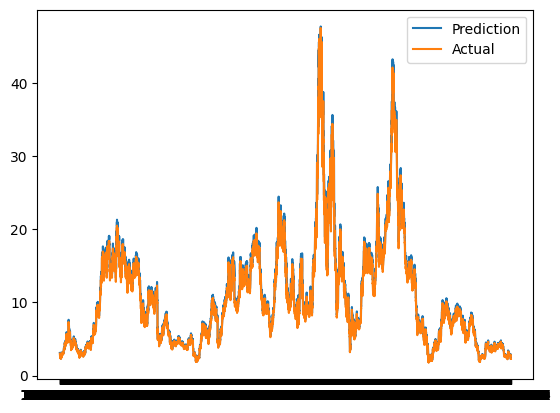

In [28]:
train_pred = model.predict(X_train).flatten()

plt.plot(dates_train, train_pred)
plt.plot(dates_train, y_train)
plt.legend(['Prediction', 'Actual'])

35/35 [==============================] - 0s 441us/step


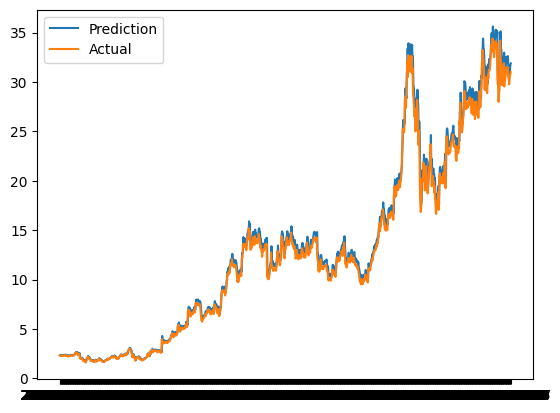

In [29]:
val_pred = model.predict(X_val).flatten()

plt.plot(dates_val, val_pred)
plt.plot(dates_val, y_val)
plt.legend(['Prediction', 'Actual'])


35/35 [==============================] - 0s 506us/step


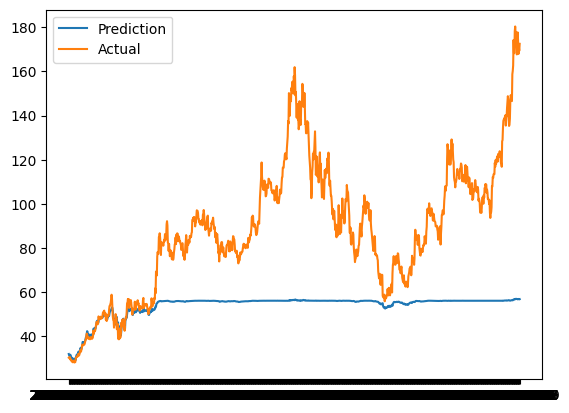

In [30]:
test_pred = model.predict(X_test).flatten()

plt.plot(dates_test, test_pred)
plt.plot(dates_test, y_test)
plt.legend(['Prediction', 'Actual'])


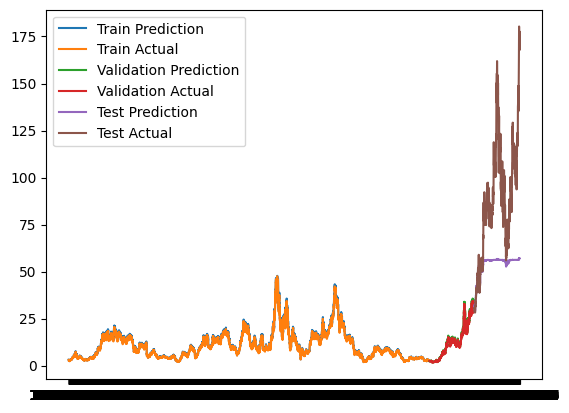

In [31]:
#plot all three on the same graph
plt.plot(dates_train, train_pred)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_pred)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_pred)
plt.plot(dates_test, y_test)
plt.legend(['Train Prediction', 'Train Actual', 'Validation Prediction', 'Validation Actual', 'Test Prediction', 'Test Actual'])
